#### This notebook is to perform redundancy analysis for alpha-diversity

In [1]:
library(xlsx)
library(dplyr)
library(ggplot2)
library(vegan)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



In [2]:
options(warn=-1)

In [3]:
RDAanalysis <- function(metricsName, ctsName, catName, dat){
  dat[catName] = lapply(dat[catName], factor)
  dat[ctsName] = lapply(dat[ctsName], as.character)
  dat[ctsName] = lapply(dat[ctsName], as.numeric)
  df <- na.omit(dat)
  ind <- rownames(df)
  df <- df[c(catName, ctsName)]
  alpha <- as.numeric(as.character(dat[metricsName][ind,1]))
  mod0 <- rda(alpha ~ 1., df)
  mod1 <- rda(alpha ~ ., df)
  step.res <- ordiR2step(mod0, mod1, perm.max = 1000)
  table = step.res$anova
  n <- nrow(table)
  if(is.null(n)) return(cat("No anova"))
  ES.RDA <- numeric(n-1)
  ES.RDA[1] <- table[1,1]
  for (i in 2:n){
    ES.RDA[i] <- table[i, 1] - table[i-1, 1]
  }
  table$ES.RDA <- ES.RDA
  table = table[-n, ]
  print(table)
  return(table)
}

In [4]:
alphaData <- read.delim('meta_mGtax_qiita_min100k_332s_alphas.tsv',sep = '\t', header = TRUE)
metaData <- read.xlsx('metadata12120_filtered_highlighted.xlsx', sheetIndex = 1) 
zscoreData <- read.xlsx("zscore.xlsx", sheetName = "Sheet1")

In [5]:
dim(alphaData)
head(alphaData)
dim(metaData)
head(metaData)
dim(zscoreData)
head(zscoreData)

[1] 333 130

,id,age_years,age_wk40,ageyr1,ageyr2,ageyr2_baycog,ageyr3,ageyr3_mulcog,ageyr4,ageyr4_wppcog,⋯,wtkg_yr2,wtkg_yr3,wtkg_yr4,wtkg_yr5,X.SampleID_stripped,pipeline_count_reads,coassembly_all,observed_otus,pielou_e,shannon
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,#q2:types,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,⋯,numeric,numeric,numeric,numeric,categorical,numeric,categorical,numeric,numeric,numeric
2,BVC.1614.10.36,3,0.77,1,2,2,3.01,3,4.03,4.03,⋯,9.46,11.9,13.1,15,BVC.1614.10.36,700757,all,466,0.435931096000266,3.86417438118951
3,BVC.1542.10.10,0.75,0.8,1.01,2.02,2.02,3.01,3.01,4.01,4.04,⋯,10.78,12.3,14.4,16,BVC.1542.10.10,1153005,all,504,0.32324051510413,2.90182058670608
4,BVC.1681.10.10,0.75,0.77,1.01,2,2,3.02,3,4.01,4.01,⋯,9.81,11.8,13.1,15.1,BVC.1681.10.10,1334615,all,332,0.229089108123942,1.91863031383011
5,BVC.1630.10.13,2,0.8,1.02,2.01,2.01,3.03,3,4.06,4.06,⋯,11.38,14.6,16.7,20,BVC.1630.10.13,598867,all,477,0.352729489831493,3.1385324882963
6,BVC.1661.10.36,3,0.78,1,2.04,2.03,3.06,3.01,4.04,4.04,⋯,9.2,11.9,13.8,14.7,BVC.1661.10.36,591823,all,387,0.541192818544935,4.65219616287489


[1] 385 124

,sample_name,sid,age_years,age_wk40,ageyr1,ageyr2,ageyr2_baycog,ageyr3,ageyr3_mulcog,ageyr4,⋯,wtkg_wk40,wtkg_yr1,wtkg_yr2,wtkg_yr3,wtkg_yr4,wtkg_yr5,bmi,host_subject_id,collection_device_id,collection_timestamp
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
1,12120.BVC.1473.10.10,1473,0.75,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,7.24,7.36,9.41,11.1,13.0,14.9,15.98,1473,BVC-1473-10-10,2013
2,12120.BVC.1473.10.13,1473,2.00,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,7.24,7.36,9.41,11.1,13.0,14.9,14.27,1473,BVC-1473-10-13,2014
3,12120.BVC.1473.10.36,1473,3.00,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,7.24,7.36,9.41,11.1,13.0,14.9,13.86,1473,BVC-1473-10-36,2015
4,12120.BVC.1475.10.10,1475,0.75,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,8.32,8.32,10.49,12.2,13.3,14.6,16.74,1475,BVC-1475-10-10,2013
5,12120.BVC.1475.10.13,1475,2.00,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,8.32,8.32,10.49,12.2,13.3,14.6,15.79,1475,BVC-1475-10-13,2014
6,12120.BVC.1475.10.36,1475,3.00,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,8.32,8.32,10.49,12.2,13.3,14.6,15.33,1475,BVC-1475-10-36,2015


[1] 385  61

,sample_name,sid,age_years,age_wk40,haz_wk40,haz_yr1,haz_yr2,haz_yr3,haz_yr4,haz_yr5,⋯,time_point,timepoint_months,weight_kg,wtkg_wk40,wtkg_yr1,wtkg_yr2,wtkg_yr3,wtkg_yr4,wtkg_yr5,bmi
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,⋯,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,12120.BVC.1473.10.10,1473,0.75,0.77,-1.34,-1.39,-1.47,-1.72,-2.1,-1.47,⋯,1,9,7.24,7.24,7.36,9.41,11.1,13.0,14.9,15.98
2,12120.BVC.1473.10.13,1473,2.00,0.77,-1.34,-1.39,-1.47,-1.72,-2.1,-1.47,⋯,2,24,9.41,7.24,7.36,9.41,11.1,13.0,14.9,14.27
3,12120.BVC.1473.10.36,1473,3.00,0.77,-1.34,-1.39,-1.47,-1.72,-2.1,-1.47,⋯,3,36,11.1,7.24,7.36,9.41,11.1,13.0,14.9,13.86
4,12120.BVC.1475.10.10,1475,0.75,0.77,-0.83,-1.06,-1.9,-2.12,-2.13,-1.9,⋯,1,9,8.32,8.32,8.32,10.49,12.2,13.3,14.6,16.74
5,12120.BVC.1475.10.13,1475,2.00,0.77,-0.83,-1.06,-1.9,-2.12,-2.13,-1.9,⋯,2,24,10.49,8.32,8.32,10.49,12.2,13.3,14.6,15.79
6,12120.BVC.1475.10.36,1475,3.00,0.77,-0.83,-1.06,-1.9,-2.12,-2.13,-1.9,⋯,3,36,12.2,8.32,8.32,10.49,12.2,13.3,14.6,15.33


In [6]:
zName <- names(zscoreData)
metaData[zName] <- zscoreData
dim(metaData)
head(metaData)

[1] 385 136

,sample_name,sid,age_years,age_wk40,ageyr1,ageyr2,ageyr2_baycog,ageyr3,ageyr3_mulcog,ageyr4,⋯,underwt_yr2,underwt_yr3,underwt_yr4,underwt_yr5,waste_wk40,waste_yr1,waste_yr2,waste_yr3,waste_yr4,waste_yr5
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,12120.BVC.1473.10.10,1473,0.75,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Risk of wasting,Risk of wasting,Control,Control
2,12120.BVC.1473.10.13,1473,2.00,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Risk of wasting,Risk of wasting,Control,Control
3,12120.BVC.1473.10.36,1473,3.00,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Risk of wasting,Risk of wasting,Control,Control
4,12120.BVC.1475.10.10,1475,0.75,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Control,Control,Control,Control
5,12120.BVC.1475.10.13,1475,2.00,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Control,Control,Control,Control
6,12120.BVC.1475.10.36,1475,3.00,0.77,1,2.02,2.02,3.04,3.04,4.04,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Control,Control,Control,Control


In [7]:
alphaDataSubNames <- c("collection_device_id", "observed_otus", "pielou_e", "shannon")
alphaDataSub <- alphaData[alphaDataSubNames]
head(alphaDataSub)

,collection_device_id,observed_otus,pielou_e,shannon
,<fct>,<fct>,<fct>,<fct>
1,categorical,numeric,numeric,numeric
2,BVC-1614-10-36,466,0.435931096000266,3.86417438118951
3,BVC-1542-10-10,504,0.32324051510413,2.90182058670608
4,BVC-1681-10-10,332,0.229089108123942,1.91863031383011
5,BVC-1630-10-13,477,0.352729489831493,3.1385324882963
6,BVC-1661-10-36,387,0.541192818544935,4.65219616287489


In [8]:
data <- merge(alphaDataSub, metaData, by = "collection_device_id")

In [9]:
dim(data)
head(data)

[1] 332 139

,collection_device_id,observed_otus,pielou_e,shannon,sample_name,sid,age_years,age_wk40,ageyr1,ageyr2,⋯,underwt_yr2,underwt_yr3,underwt_yr4,underwt_yr5,waste_wk40,waste_yr1,waste_yr2,waste_yr3,waste_yr4,waste_yr5
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,BVC-1473-10-10,295,0.278647320658207,2.28618176649468,12120.BVC.1473.10.10,1473,0.75,0.77,1,2.02,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Risk of wasting,Risk of wasting,Control,Control
2,BVC-1473-10-13,341,0.405716480932438,3.41354751523856,12120.BVC.1473.10.13,1473,2.00,0.77,1,2.02,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Risk of wasting,Risk of wasting,Control,Control
3,BVC-1473-10-36,408,0.563130933941578,4.88371098236301,12120.BVC.1473.10.36,1473,3.00,0.77,1,2.02,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Risk of wasting,Risk of wasting,Control,Control
4,BVC-1475-10-10,294,0.241921660373757,1.98367834818359,12120.BVC.1475.10.10,1475,0.75,0.77,1,2.02,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Control,Control,Control,Control
5,BVC-1475-10-13,391,0.514270605443919,4.42839693600385,12120.BVC.1475.10.13,1475,2.00,0.77,1,2.02,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Control,Control,Control,Control
6,BVC-1475-10-36,555,0.525784193790572,4.79322955997679,12120.BVC.1475.10.36,1475,3.00,0.77,1,2.02,⋯,Risk of Underweight,Risk of Underweight,Risk of Underweight,Risk of Underweight,Control,Risk of wasting,Control,Control,Control,Control


In [10]:
ctsName <- c("age_years", "days_exclusive_bf", 
             "cogcmp_yr2","langcmp_yr2", "motorcmp_yr2", "soemocmp_yr2",
             "ageyr3_mulcog",
             "fsiq_yr4", "fsiq_yr5",
             "viq_yr4", "viq_yr5",
             "haz_yr1", "haz_yr2", "haz_yr3", "haz_yr4", "haz_yr5",
             "waz_yr1", "waz_yr2", "waz_yr3", "waz_yr4", "waz_yr5",
             "whz_yr1", "whz_yr2", "whz_yr3", "whz_yr4", "whz_yr5") 
catName <- c("sex","recent_antibiotic_use",
             "cogcmp_yr2_quartile", "langcmp_yr2_quartile", 
             "motorcmp_yr2_quartile", "soemocmp_yr2_quartile",
             "underwt_yr1", "waste_yr1", "stunting_yr1",
             "underwt_yr2", "waste_yr2", "stunting_yr2",
             "underwt_yr3", "waste_yr3", "stunting_yr3",
             "underwt_yr4", "waste_yr4", "stunting_yr4",
             "underwt_yr5", "waste_yr5", "stunting_yr5")

In [11]:
secctsName <- c("age_wk40", "income","mbmi")
seccatName <- c("csection")

In [12]:
data <- data[c(alphaDataSubNames, "time_point", ctsName, catName, seccatName, secctsName)]

In [13]:
dim(data)
head(data)

[1] 332  56

,collection_device_id,observed_otus,pielou_e,shannon,time_point,age_years,days_exclusive_bf,cogcmp_yr2,langcmp_yr2,motorcmp_yr2,⋯,underwt_yr4,waste_yr4,stunting_yr4,underwt_yr5,waste_yr5,stunting_yr5,csection,age_wk40,income,mbmi
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,BVC-1473-10-10,295,0.278647320658207,2.28618176649468,1,0.75,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
2,BVC-1473-10-13,341,0.405716480932438,3.41354751523856,2,2.00,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
3,BVC-1473-10-36,408,0.563130933941578,4.88371098236301,3,3.00,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
4,BVC-1475-10-10,294,0.241921660373757,1.98367834818359,1,0.75,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
5,BVC-1475-10-13,391,0.514270605443919,4.42839693600385,2,2.00,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
6,BVC-1475-10-36,555,0.525784193790572,4.79322955997679,3,3.00,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9


In [14]:
metrics <- c("observed_otus", "pielou_e", "shannon")

###### All Timepoints

In [15]:
#all timepoints with numerical zscores
ctsName <- c("age_years", "days_exclusive_bf", 
             "cogcmp_yr2","langcmp_yr2", "motorcmp_yr2", "soemocmp_yr2",
             "ageyr3_mulcog",
             "fsiq_yr4", "fsiq_yr5",
             "viq_yr4", "viq_yr5",
             "haz_yr1", "haz_yr2", "haz_yr3", "haz_yr4", "haz_yr5",
             "waz_yr1", "waz_yr2", "waz_yr3", "waz_yr4", "waz_yr5",
             "whz_yr1", "whz_yr2", "whz_yr3", "whz_yr4", "whz_yr5") 
catName <- c("sex","recent_antibiotic_use")
table <- RDAanalysis(metrics[3], ctsName, catName, data)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                          R2.adjusted
<All variables>          0.2987252772
+ age_years              0.2821537071
+ recent_antibiotic_use  0.2305366995
+ whz_yr4                0.0065355069
+ waz_yr4                0.0059293153
+ waz_yr3                0.0033975855
+ waz_yr5                0.0030103693
+ whz_yr3                0.0030057012
+ whz_yr5                0.0027554310
+ haz_yr4                0.0010379000
+ haz_yr3                0.0002870397
+ haz_yr5                0.0001959951
+ haz_yr2                0.0000216687
<none>                   0.0000000000
+ waz_yr2               -0.0003256973
+ whz_yr2               -0.0014765366
+ motorcmp_yr2          -0.0015664078
+ soemocmp_yr2          -0.0016889122
+ cogcmp_yr2            -0.0017269390
+ langcmp_yr2           -0.0018589269
+ sex                   -0.0018805145
+ days_exclusive_bf     -0.0022647141
+ fsiq_yr4              -0.0023802955
+ fsiq_yr5              -0.0025041153
+ waz_yr1     

In [16]:
#all timepoints with categorical zscores
ctsName <- c("age_years", "days_exclusive_bf") 
catName <- c("sex","recent_antibiotic_use",
             "cogcmp_yr2_quartile", "langcmp_yr2_quartile", 
             "motorcmp_yr2_quartile", "soemocmp_yr2_quartile",
             "underwt_yr1", "waste_yr1", "stunting_yr1",
             "underwt_yr2", "waste_yr2", "stunting_yr2",
             "underwt_yr3", "waste_yr3", "stunting_yr3",
             "underwt_yr4", "waste_yr4", "stunting_yr4",
             "underwt_yr5", "waste_yr5", "stunting_yr5")
table <- RDAanalysis(metrics[3], ctsName, catName, data)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                          R2.adjusted
<All variables>          3.032078e-01
+ age_years              2.838627e-01
+ recent_antibiotic_use  2.211894e-01
+ cogcmp_yr2_quartile    2.878010e-03
+ soemocmp_yr2_quartile  7.105809e-04
+ underwt_yr2            5.658204e-05
<none>                   0.000000e+00
+ stunting_yr5          -2.139365e-04
+ waste_yr4             -6.953739e-04
+ waste_yr1             -1.111357e-03
+ underwt_yr3           -1.794453e-03
+ days_exclusive_bf     -2.297386e-03
+ sex                   -2.478783e-03
+ stunting_yr4          -2.582983e-03
+ stunting_yr2          -2.681801e-03
+ underwt_yr1           -2.720262e-03
+ waste_yr3             -3.083834e-03
+ langcmp_yr2_quartile  -4.016023e-03
+ underwt_yr5           -4.276469e-03
+ motorcmp_yr2_quartile -4.708051e-03
+ underwt_yr4           -5.383603e-03
+ waste_yr5             -5.415711e-03
+ stunting_yr1          -5.615517e-03
+ stunting_yr3          -5.692258e-03
+ waste_yr2   

In [17]:
#all timepoints with secondary variables
table <- RDAanalysis(metrics[3], c(ctsName,secctsName), c(catName, seccatName), data)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                          R2.adjusted
<All variables>          3.046069e-01
+ age_years              2.838627e-01
+ recent_antibiotic_use  2.211894e-01
+ cogcmp_yr2_quartile    2.878010e-03
+ soemocmp_yr2_quartile  7.105809e-04
+ underwt_yr2            5.658204e-05
<none>                   0.000000e+00
+ stunting_yr5          -2.139365e-04
+ csection              -6.643296e-04
+ waste_yr4             -6.953739e-04
+ waste_yr1             -1.111357e-03
+ mbmi                  -1.742942e-03
+ underwt_yr3           -1.794453e-03
+ days_exclusive_bf     -2.297386e-03
+ sex                   -2.478783e-03
+ income                -2.527842e-03
+ stunting_yr4          -2.582983e-03
+ stunting_yr2          -2.681801e-03
+ underwt_yr1           -2.720262e-03
+ age_wk40              -3.018379e-03
+ waste_yr3             -3.083834e-03
+ langcmp_yr2_quartile  -4.016023e-03
+ underwt_yr5           -4.276469e-03
+ motorcmp_yr2_quartile -4.708051e-03
+ underwt_yr4 

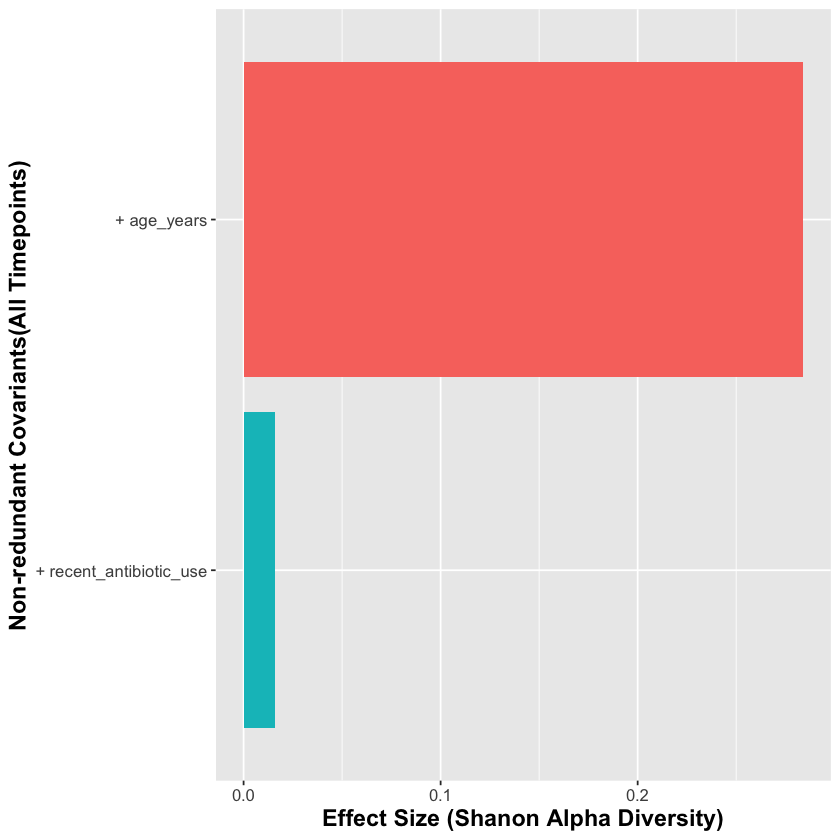

In [18]:
covariates = rownames(table)
ggplot(table, aes(x=reorder(covariates, ES.RDA), y=ES.RDA, fill=covariates)) +
  labs(x = 'Non-redundant Covariants(All Timepoints)', y = 'Effect Size (Shanon Alpha Diversity)') +
  geom_bar(stat='identity') +
  theme(axis.text=element_text(size=10), 
        axis.title=element_text(size=14,face="bold"), 
        legend.position="none") + 
  coord_flip()

##### Timepoint1

In [19]:
tp1 <- data[data$time_point==1, ]
head(tp1)

,collection_device_id,observed_otus,pielou_e,shannon,time_point,age_years,days_exclusive_bf,cogcmp_yr2,langcmp_yr2,motorcmp_yr2,⋯,underwt_yr4,waste_yr4,stunting_yr4,underwt_yr5,waste_yr5,stunting_yr5,csection,age_wk40,income,mbmi
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,BVC-1473-10-10,295,0.278647320658207,2.28618176649468,1,0.75,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
4,BVC-1475-10-10,294,0.241921660373757,1.98367834818359,1,0.75,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
7,BVC-1480-10-10,283,0.298533394835474,2.43145247500733,1,0.75,116,85,86,85,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Control,No,0.78,7000,23.2
10,BVC-1481-10-10,213,0.348051437068151,2.69207679862445,1,0.75,170,100,106,94,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Risk of Stunting,No,0.77,6000,18.3
14,BVC-1492-10-10,380,0.437793154342847,3.75182411903395,1,0.75,115,100,106,97,⋯,Risk of Underweight,Risk of wasting,Control,Risk of Underweight,Risk of wasting,Control,Yes,0.78,18000,22.8
16,BVC-1499-10-10,502,0.516912704328292,4.63750484047175,1,0.75,186,85,89,88,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Control,Stunting,No,0.77,5000,18.8


In [20]:
#categorical zscore
ctsName <- c("days_exclusive_bf") 
catName <- c("sex", "recent_antibiotic_use", "underwt_yr1", "waste_yr1", "stunting_yr1")
table <- RDAanalysis(metrics[3], ctsName, catName, tp1)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                         R2.adjusted
<All variables>          0.061609065
+ sex                    0.039926070
+ recent_antibiotic_use  0.027633293
+ stunting_yr1           0.005038813
<none>                   0.000000000
+ underwt_yr1           -0.000554309
+ days_exclusive_bf     -0.008378203
+ waste_yr1             -0.015804897

      Df     AIC      F Pr(>F)  
+ sex  1 -93.936 5.6161  0.026 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: R2.adj= 0.03992607 
Call: alpha ~ sex 
 
                        R2.adjusted
+ recent_antibiotic_use  0.08479295
<All variables>          0.06160906
+ underwt_yr1            0.04443259
<none>                   0.03992607
+ stunting_yr1           0.03630466
+ days_exclusive_bf      0.03350953
+ waste_yr1              0.02372989

        R2.adj Df     AIC      F Pr(>F)   ES.RDA
+ sex 0.039926  1 -93.936 5.6161  0.026 0.039926


In [21]:
#with secondary variables
table <- RDAanalysis(metrics[3], c(ctsName,secctsName), c(catName, seccatName), tp1)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                         R2.adjusted
<All variables>          0.052802518
+ sex                    0.039926070
+ recent_antibiotic_use  0.027633293
+ stunting_yr1           0.005038813
<none>                   0.000000000
+ underwt_yr1           -0.000554309
+ csection              -0.003638896
+ days_exclusive_bf     -0.008378203
+ age_wk40              -0.008441277
+ mbmi                  -0.008542059
+ income                -0.009014491
+ waste_yr1             -0.015804897

      Df     AIC      F Pr(>F)  
+ sex  1 -93.936 5.6161   0.03 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: R2.adj= 0.03992607 
Call: alpha ~ sex 
 
                        R2.adjusted
+ recent_antibiotic_use  0.08479295
<All variables>          0.05280252
+ underwt_yr1            0.04443259
<none>                   0.03992607
+ csection               0.03697077
+ stunting_yr1           0.03630466
+ days_exclusive_bf      0.03350953
+ income     

In [22]:
#continuous zscore
ctsName <- c("days_exclusive_bf","haz_yr1", "waz_yr1","whz_yr1") 
catName <- c("sex","recent_antibiotic_use")
table <- RDAanalysis(metrics[3], ctsName, catName, tp1)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                         R2.adjusted
<All variables>          0.060663026
+ sex                    0.039926070
+ recent_antibiotic_use  0.027633293
<none>                   0.000000000
+ haz_yr1               -0.005642456
+ waz_yr1               -0.005887573
+ whz_yr1               -0.007860347
+ days_exclusive_bf     -0.008378203

      Df     AIC      F Pr(>F)  
+ sex  1 -93.936 5.6161  0.024 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Step: R2.adj= 0.03992607 
Call: alpha ~ sex 
 
                        R2.adjusted
+ recent_antibiotic_use  0.08479295
<All variables>          0.06066303
<none>                   0.03992607
+ haz_yr1                0.03512962
+ waz_yr1                0.03478352
+ days_exclusive_bf      0.03350953
+ whz_yr1                0.03258196

        R2.adj Df     AIC      F Pr(>F)   ES.RDA
+ sex 0.039926  1 -93.936 5.6161  0.024 0.039926


In [23]:
#continuous zscore with secondary variables
table <- RDAanalysis(metricsName, c(ctsName,secctsName), c(catName, seccatName), tp1)

ERROR: Error in `[.data.frame`(dat, metricsName): object 'metricsName' not found


##### Timepoint 2

In [24]:
tp2 <- data[data$time_point==2, ]
head(tp2)

,collection_device_id,observed_otus,pielou_e,shannon,time_point,age_years,days_exclusive_bf,cogcmp_yr2,langcmp_yr2,motorcmp_yr2,⋯,underwt_yr4,waste_yr4,stunting_yr4,underwt_yr5,waste_yr5,stunting_yr5,csection,age_wk40,income,mbmi
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
2,BVC-1473-10-13,341,0.405716480932438,3.41354751523856,2,2,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
5,BVC-1475-10-13,391,0.514270605443919,4.42839693600385,2,2,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
8,BVC-1480-10-13,332,0.500808939678085,4.194294617375,2,2,116,85,86,85,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Control,No,0.78,7000,23.2
11,BVC-1481-10-13,363,0.467869068773255,3.9786770290461,2,2,170,100,106,94,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Risk of Stunting,No,0.77,6000,18.3
12,BVC-1487-10-13,353,0.468109647400268,3.96185741013554,2,2,148,90,100,94,⋯,Underweight,Wasting,Risk of Stunting,Underweight,Wasting,Control,Yes,0.77,14000,18.1
15,BVC-1492-10-13,426,0.458473501169978,4.00463290128803,2,2,115,100,106,97,⋯,Risk of Underweight,Risk of wasting,Control,Risk of Underweight,Risk of wasting,Control,Yes,0.78,18000,22.8


In [25]:
#categorical zscore
ctsName <- c("days_exclusive_bf") 
catName <- c("sex", "recent_antibiotic_use", "underwt_yr2",	"waste_yr2", "stunting_yr2",
             "cogcmp_yr2_quartile", "langcmp_yr2_quartile", 
             "motorcmp_yr2_quartile", "soemocmp_yr2_quartile")
table <- RDAanalysis(metrics[3], ctsName, catName, tp2)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                         R2.adjusted
<All variables>          0.073056779
+ cogcmp_yr2_quartile    0.047291921
+ soemocmp_yr2_quartile  0.046290808
+ recent_antibiotic_use  0.029182036
+ langcmp_yr2_quartile   0.023130472
+ underwt_yr2            0.017409896
+ sex                    0.008263806
+ stunting_yr2           0.007135362
<none>                   0.000000000
+ days_exclusive_bf     -0.005164772
+ motorcmp_yr2_quartile -0.011204849
+ waste_yr2             -0.011441063

                      Df     AIC      F Pr(>F)  
+ cogcmp_yr2_quartile  4 -62.288 2.4023  0.062 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

No anova

In [26]:
#categorical zscore with secondary variables
table <- RDAanalysis(metrics[3], c(ctsName,secctsName), c(catName, seccatName), tp2)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                         R2.adjusted
+ cogcmp_yr2_quartile    0.047291921
+ soemocmp_yr2_quartile  0.046290808
<All variables>          0.041597614
+ recent_antibiotic_use  0.029182036
+ langcmp_yr2_quartile   0.023130472
+ underwt_yr2            0.017409896
+ sex                    0.008263806
+ stunting_yr2           0.007135362
<none>                   0.000000000
+ income                -0.003890109
+ mbmi                  -0.004350902
+ days_exclusive_bf     -0.005164772
+ csection              -0.008394127
+ age_wk40              -0.008564289
+ motorcmp_yr2_quartile -0.011204849
+ waste_yr2             -0.011441063

No anova

In [27]:
#continuous zscore
ctsName <- c("days_exclusive_bf", "cogcmp_yr2", 
             "langcmp_yr2", "motorcmp_yr2","soemocmp_yr2",
             "haz_yr2", "waz_yr2","whz_yr2") 
catName <- c("sex","recent_antibiotic_use")
table <- RDAanalysis(metrics[3], ctsName, catName, tp2)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                         R2.adjusted
<All variables>          0.063834051
+ recent_antibiotic_use  0.029182036
+ haz_yr2                0.028129916
+ waz_yr2                0.018275639
+ sex                    0.008263806
+ whz_yr2                0.002784433
<none>                   0.000000000
+ days_exclusive_bf     -0.005164772
+ motorcmp_yr2          -0.006491596
+ soemocmp_yr2          -0.006987593
+ cogcmp_yr2            -0.007048405
+ langcmp_yr2           -0.007557537

                        Df   AIC      F Pr(>F)
+ recent_antibiotic_use  3 -61.1 2.1322  0.118

No anova

In [28]:
#continuous zscore with secondary variables
table <- RDAanalysis(metrics[3], c(ctsName,secctsName), c(catName, seccatName), tp2)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                         R2.adjusted
<All variables>          0.036355128
+ recent_antibiotic_use  0.029182036
+ haz_yr2                0.028129916
+ waz_yr2                0.018275639
+ sex                    0.008263806
+ whz_yr2                0.002784433
<none>                   0.000000000
+ income                -0.003890109
+ mbmi                  -0.004350902
+ days_exclusive_bf     -0.005164772
+ motorcmp_yr2          -0.006491596
+ soemocmp_yr2          -0.006987593
+ cogcmp_yr2            -0.007048405
+ langcmp_yr2           -0.007557537
+ csection              -0.008394127
+ age_wk40              -0.008564289

                        Df   AIC      F Pr(>F)
+ recent_antibiotic_use  3 -61.1 2.1322  0.112

No anova

##### Timepoint 3

In [29]:
tp3 <- data[data$time_point==3, ]
head(tp3)

,collection_device_id,observed_otus,pielou_e,shannon,time_point,age_years,days_exclusive_bf,cogcmp_yr2,langcmp_yr2,motorcmp_yr2,⋯,underwt_yr4,waste_yr4,stunting_yr4,underwt_yr5,waste_yr5,stunting_yr5,csection,age_wk40,income,mbmi
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
3,BVC-1473-10-36,408,0.563130933941578,4.88371098236301,3,3,121,90,86,88,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,7000,18.5
6,BVC-1475-10-36,555,0.525784193790572,4.79322955997679,3,3,128,85,100,97,⋯,Risk of Underweight,Control,Stunting,Risk of Underweight,Control,Risk of Stunting,No,0.77,13000,18.9
9,BVC-1480-10-36,494,0.407409773116689,3.64565226358472,3,3,116,85,86,85,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Risk of wasting,Control,No,0.78,7000,23.2
13,BVC-1487-10-36,493,0.525591323015675,4.70164766092428,3,3,148,90,100,94,⋯,Underweight,Wasting,Risk of Stunting,Underweight,Wasting,Control,Yes,0.77,14000,18.1
18,BVC-1499-10-36,371,0.437254773276483,3.73208989965668,3,3,186,85,89,88,⋯,Risk of Underweight,Risk of wasting,Risk of Stunting,Risk of Underweight,Control,Stunting,No,0.77,5000,18.8
21,BVC-1500-10-36,328,0.357510449759484,2.98791217605929,3,3,168,80,94,85,⋯,Risk of Underweight,Control,Risk of Stunting,Risk of Underweight,Risk of wasting,Risk of Stunting,No,0.77,4800,20.0


In [30]:
#categorical zscore
#remove recent_antibiotic_use because not collected for all samples
ctsName <- c("days_exclusive_bf", "ageyr3_mulcog") 
catName <- c("sex","underwt_yr3", "waste_yr3", "stunting_yr3")
table <- RDAanalysis(metrics[3], ctsName, catName, tp3)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                      R2.adjusted
+ days_exclusive_bf  0.0009803476
<none>               0.0000000000
+ sex               -0.0018527941
+ ageyr3_mulcog     -0.0091492262
+ waste_yr3         -0.0094364318
+ underwt_yr3       -0.0110866515
+ stunting_yr3      -0.0157703880
<All variables>     -0.0279819838

No anova

In [31]:
#categorical zscore with secondary variables
table <- RDAanalysis(metrics[3], c(ctsName,secctsName), c(catName, seccatName), tp3)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                      R2.adjusted
+ days_exclusive_bf  0.0009803476
<none>               0.0000000000
+ mbmi              -0.0008138014
+ sex               -0.0018527941
+ csection          -0.0060733339
+ age_wk40          -0.0061971820
+ income            -0.0088503507
+ ageyr3_mulcog     -0.0091492262
+ waste_yr3         -0.0094364318
+ underwt_yr3       -0.0110866515
+ stunting_yr3      -0.0157703880
<All variables>     -0.0554403236

No anova

In [32]:
#continuous zscore
ctsName <- c("days_exclusive_bf", "ageyr3_mulcog", "haz_yr3", "waz_yr3", "whz_yr3") 
catName <- c("sex")
table <- RDAanalysis(metrics[3], ctsName, catName, tp2)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                      R2.adjusted
+ haz_yr3            0.0359402895
<All variables>      0.0277699955
+ waz_yr3            0.0207859555
+ sex                0.0082638057
<none>               0.0000000000
+ whz_yr3           -0.0004647957
+ days_exclusive_bf -0.0051647715
+ ageyr3_mulcog     -0.0089278675

No anova

In [33]:
#continuous zscore with secondary variables
table <- RDAanalysis(metrics[3], c(ctsName,secctsName), c(catName, seccatName), tp2)

Step: R2.adj= 0 
Call: alpha ~ 1 
 
                      R2.adjusted
+ haz_yr3            0.0359402895
+ waz_yr3            0.0207859555
+ sex                0.0082638057
<All variables>      0.0029471871
<none>               0.0000000000
+ whz_yr3           -0.0004647957
+ income            -0.0038901090
+ mbmi              -0.0043509021
+ days_exclusive_bf -0.0051647715
+ csection          -0.0083941266
+ age_wk40          -0.0085642888
+ ageyr3_mulcog     -0.0089278675

No anova

In [34]:
#save data with selected variables
write.csv(data, "MetaData.csv", row.names = FALSE)